In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [76]:
def sim(mu, sigma, K, N, N_sim):
    X = np.random.standard_normal(size=(N_sim, N))
    payoffs = np.maximum(mu + sigma * X - K, 0)
    values = np.mean(payoffs, axis=1)
    return values


def solve_analytically(mu, sigma, K):
    return sigma * norm.pdf((K - mu)/sigma) - (K - mu) * (1 - norm.cdf((K - mu)/sigma))

exact value of the option = 0.032347588629663165


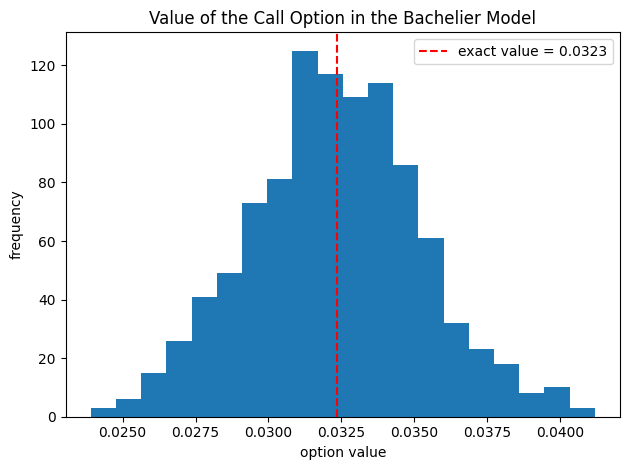

sample variance of the simulation = 8.561357038622859e-06


In [78]:
np.random.seed(1941)

mu = 2.5
sigma = 2
K = 6
N = 5000
N_sim = 1000

exact_value = solve_analytically(mu, sigma, K)
print(f"exact value of the option = {exact_value}")

values = sim(mu, sigma, K, N, N_sim)
fig, ax = plt.subplots()
ax.hist(values, bins=20)
ax.axvline(x=exact_value, color='r', label=f"exact value = {exact_value:.4f}", linestyle="dashed")
ax.set(xlabel='option value', ylabel='frequency')
ax.set_title("Value of the Call Option in the Bachelier Model")
ax.legend()
plt.tight_layout()
plt.show()
fig.savefig("value_hist.png")

sample_var = np.var(values, ddof=1)
print(f"sample variance of the simulation = {sample_var}")
# print(f"mean - 1 stdev. = {np.mean(values) - np.sqrt(sample_var)}")
# print(f"mean + 1 stdev. = {np.mean(values) + np.sqrt(sample_var)}")

In [79]:
def g(mu, sigma, K, N, a):
    """equivalent implementation"""
    # X = np.random.standard_normal(N)
    # payoffs = np.maximum(mu + sigma * X - K, 0)
    # RN_derivative = np.exp(a * X) / (np.exp(0.5 * a**2))
    # return np.mean(payoffs**2 / RN_derivative)
    
    X = np.random.normal(a, 1, N)
    payoffs = np.maximum(mu + sigma * X - K, 0)
    RN_derivative = np.exp(a * X) / (np.exp(0.5 * a**2))
    return np.mean((payoffs / RN_derivative)**2)


def sim_importance_sampling(mu, sigma, K, N, N_sim, a):
    X = np.random.normal(a, 1, size=(N_sim, N))
    payoffs = np.maximum(mu + sigma * X - K, 0)
    RN_derivative = np.exp(a * X) / (np.exp(0.5 * a**2))
    values = np.mean(payoffs / RN_derivative, axis=1)
    return values

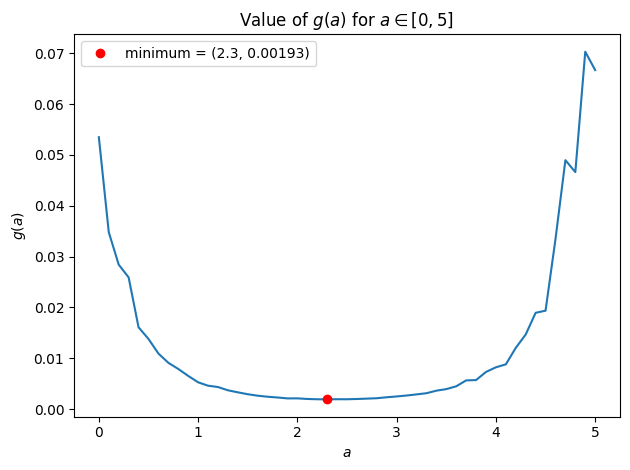

exact value of the option = 0.032347588629663165


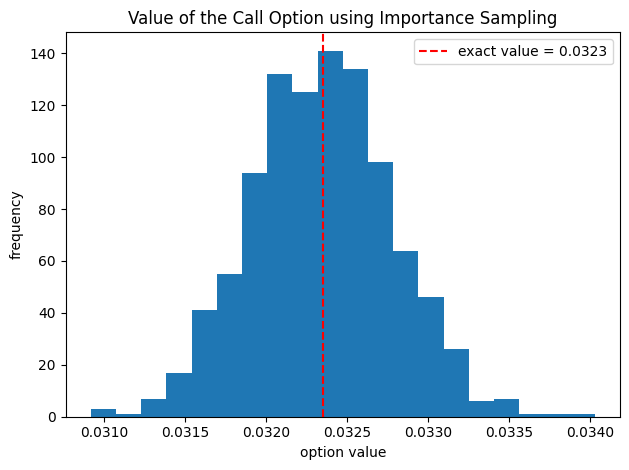

sample variance of the simulation = 1.888051068775146e-07


In [81]:
np.random.seed(1941)

mu = 2.5
sigma = 2
K = 6
N = 5000
N_sim = 1000

aa = np.linspace(0, 5, 51, endpoint=True)
gg = [g(mu, sigma, K, N, a) for a in aa]
a_min = aa[np.argmin(gg)]
g_min = np.min(gg)

fig, ax = plt.subplots()
ax.plot(aa, gg)
ax.plot(a_min, g_min, 'ro', label=f"minimum = ({a_min:.1f}, {g_min:.5f})")
ax.set(xlabel=f'$a$', ylabel=f'$g(a)$')
ax.set_title(f"Value of $g(a)$ for $a \in [0, 5]$")
ax.legend()
plt.tight_layout()
plt.show()
fig.savefig("g_a.png")

exact_value = solve_analytically(mu, sigma, K)
print(f"exact value of the option = {exact_value}")

values = sim_importance_sampling(mu, sigma, K, N, N_sim, a=2.3)
fig, ax = plt.subplots()
ax.hist(values, bins=20)
ax.axvline(x=exact_value, color='r', label=f"exact value = {exact_value:.4f}", linestyle="dashed")
ax.set(xlabel='option value', ylabel='frequency')
ax.set_title("Value of the Call Option using Importance Sampling")
ax.legend()
plt.tight_layout()
plt.show()
fig.savefig("value_hist_is.png")

sample_var = np.var(values, ddof=1)
print(f"sample variance of the simulation = {sample_var}")
# print(f"mean - 1 stdev. = {np.mean(values) - np.sqrt(sample_var)}")
# print(f"mean + 1 stdev. = {np.mean(values) + np.sqrt(sample_var)}")